In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

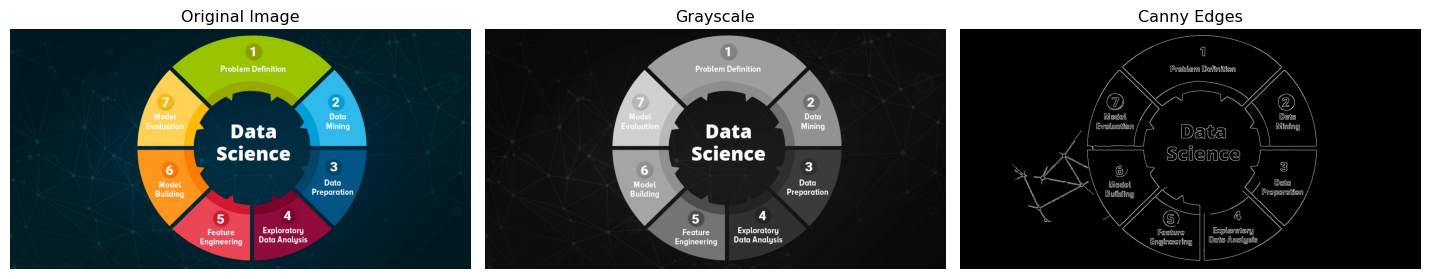

Found edges in 16716 pixels out of 752400 total pixels


In [2]:
#| eval: true
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare image
img = cv2.imread('images/image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Found edges in {np.sum(edges > 0)} pixels out of {edges.size} total pixels")

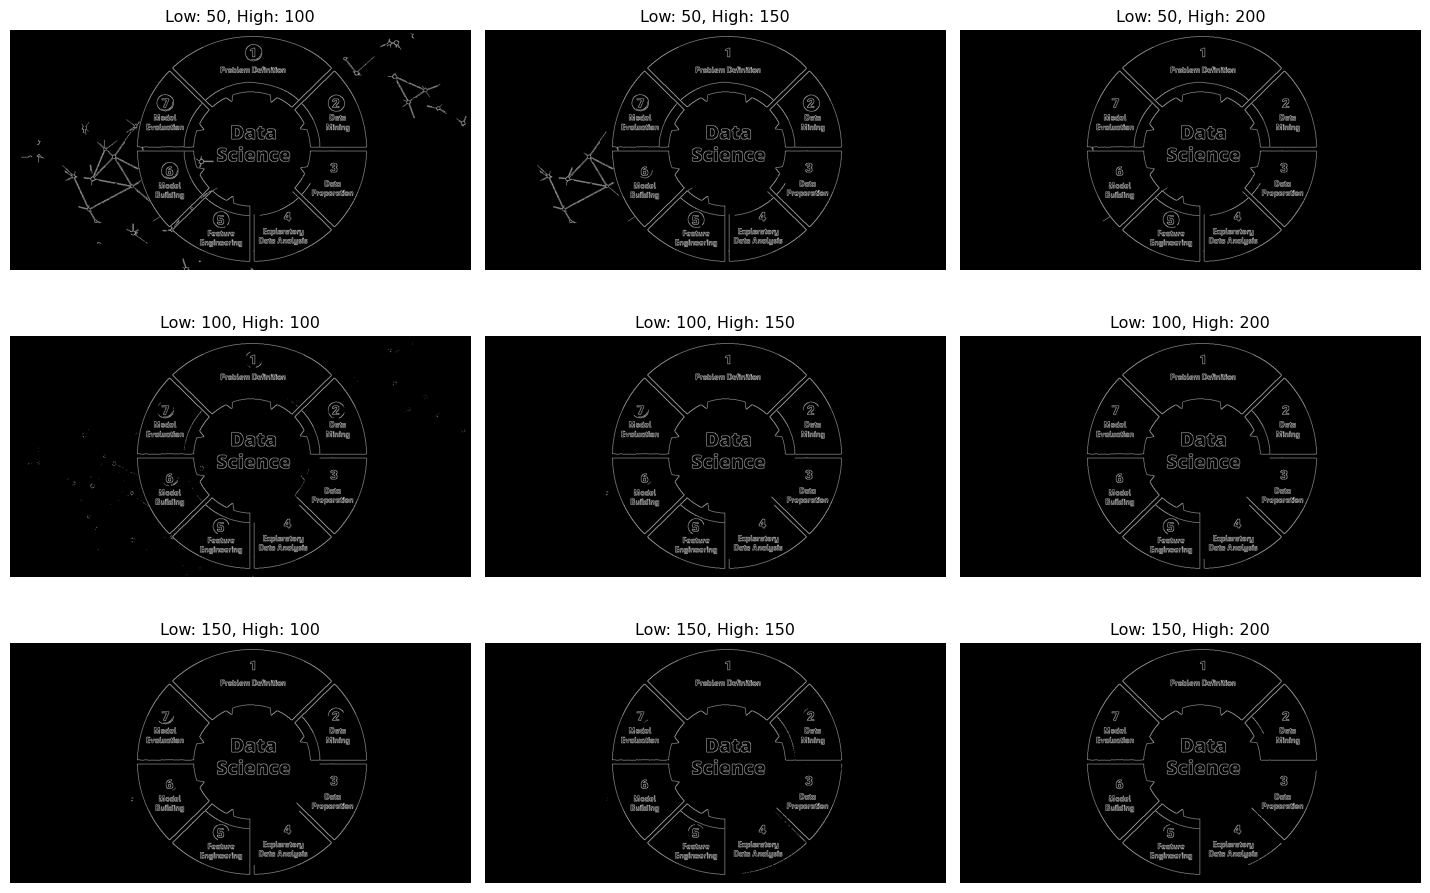

In [3]:
#| eval: true
def explore_canny_thresholds(image, low_thresholds, high_thresholds):
    """Explore different Canny threshold combinations"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    plt.figure(figsize=(15, 10))
    
    plot_idx = 1
    for low in low_thresholds:
        for high in high_thresholds:
            edges = cv2.Canny(gray, low, high)
            
            plt.subplot(len(low_thresholds), len(high_thresholds), plot_idx)
            plt.imshow(edges, cmap='gray')
            plt.title(f"Low: {low}, High: {high}")
            plt.axis('off')
            
            plot_idx += 1
    
    plt.tight_layout()
    plt.show()

# Test different threshold combinations
low_thresholds = [50, 100, 150]
high_thresholds = [100, 150, 200]
explore_canny_thresholds(img_rgb, low_thresholds, high_thresholds)

Found 42 contours!


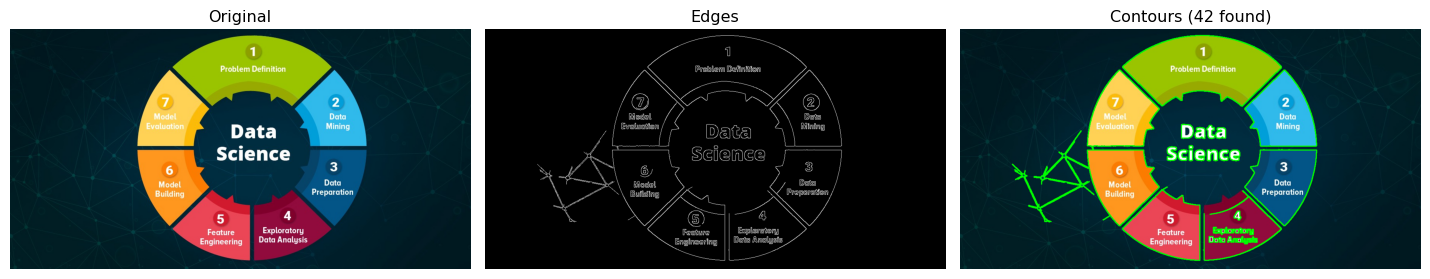

In [4]:
#| eval: true
# Find edges first
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Found {len(contours)} contours!")

# Draw contours on the original image
img_with_contours = img_rgb.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_with_contours)
plt.title(f"Contours ({len(contours)} found)")
plt.axis('off')

plt.tight_layout()
plt.show()

Contour 6:
  Area: 136 pixels
  Perimeter: 76 pixels
  Aspect Ratio: 1.29
  Extent: 0.54

Contour 9:
  Area: 111 pixels
  Perimeter: 53 pixels
  Aspect Ratio: 0.81
  Extent: 0.53

Contour 10:
  Area: 165 pixels
  Perimeter: 50 pixels
  Aspect Ratio: 0.81
  Extent: 0.79

Contour 21:
  Area: 248 pixels
  Perimeter: 73 pixels
  Aspect Ratio: 0.79
  Extent: 0.54

Contour 22:
  Area: 176 pixels
  Perimeter: 1243 pixels
  Aspect Ratio: 1.12
  Extent: 0.00

Contour 23:
  Area: 24131 pixels
  Perimeter: 695 pixels
  Aspect Ratio: 1.05
  Extent: 0.62

Contour 24:
  Area: 564 pixels
  Perimeter: 126 pixels
  Aspect Ratio: 0.93
  Extent: 0.72

Contour 25:
  Area: 416 pixels
  Perimeter: 116 pixels
  Aspect Ratio: 0.83
  Extent: 0.60

Contour 26:
  Area: 246 pixels
  Perimeter: 73 pixels
  Aspect Ratio: 0.34
  Extent: 0.85

Contour 27:
  Area: 24144 pixels
  Perimeter: 705 pixels
  Aspect Ratio: 0.95
  Extent: 0.65

Contour 28:
  Area: 24115 pixels
  Perimeter: 657 pixels
  Aspect Ratio: 0.94
  Ex

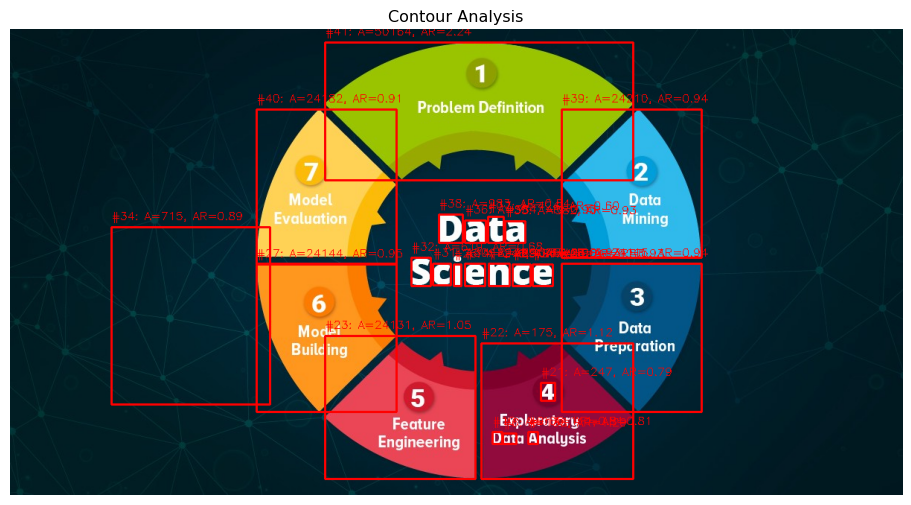

In [5]:
#| eval: true
def analyze_contours(contours, image):
    """Analyze properties of each contour"""
    img_analysis = image.copy()
    
    for i, contour in enumerate(contours):
        # Calculate contour properties
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Skip tiny contours (probably noise)
        if area < 100:
            continue
        
        # Get bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)
        
        # Calculate aspect ratio
        aspect_ratio = float(w) / h
        
        # Calculate extent (contour area / bounding rectangle area)
        rect_area = w * h
        extent = float(area) / rect_area
        
        # Draw bounding rectangle
        cv2.rectangle(img_analysis, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Add text with properties
        text = f"#{i}: A={int(area)}, AR={aspect_ratio:.2f}"
        cv2.putText(img_analysis, text, (x, y-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        
        print(f"Contour {i}:")
        print(f"  Area: {area:.0f} pixels")
        print(f"  Perimeter: {perimeter:.0f} pixels")
        print(f"  Aspect Ratio: {aspect_ratio:.2f}")
        print(f"  Extent: {extent:.2f}")
        print()
    
    return img_analysis

# Analyze our contours
analyzed_img = analyze_contours(contours, img_rgb)

plt.figure(figsize=(12, 8))
plt.imshow(analyzed_img)
plt.title("Contour Analysis")
plt.axis('off')
plt.show()

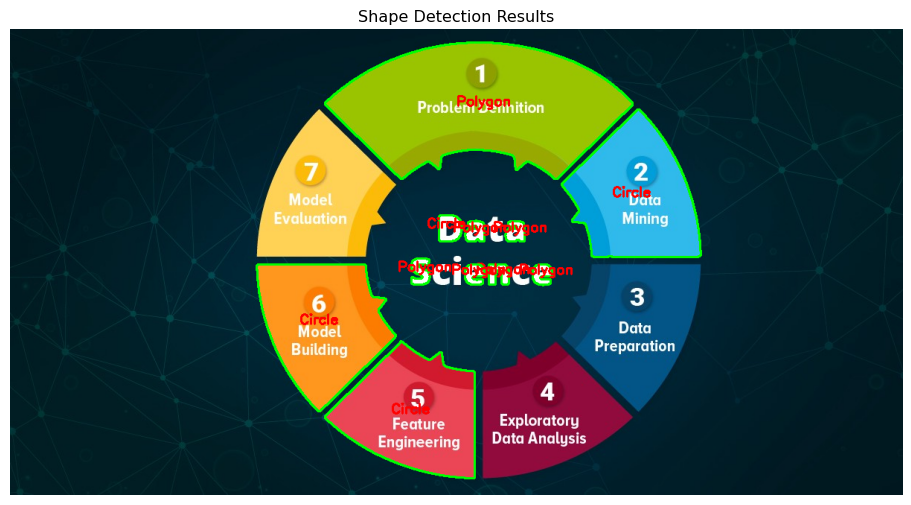

Detected shapes:
  Circle: 4
  Polygon: 7


In [6]:
#| eval: true
def classify_shape(contour):
    """Classify a contour as a specific shape"""
    # Approximate the contour to reduce number of points
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Get number of vertices
    vertices = len(approx)
    
    # Calculate aspect ratio
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    
    # Classify based on number of vertices and aspect ratio
    if vertices == 3:
        return "Triangle"
    elif vertices == 4:
        if 0.95 <= aspect_ratio <= 1.05:
            return "Square"
        else:
            return "Rectangle"
    elif vertices == 5:
        return "Pentagon"
    elif vertices > 5:
        # Check if it's circular
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        
        if circularity > 0.7:
            return "Circle"
        else:
            return "Polygon"
    else:
        return "Unknown"

def detect_shapes(image):
    """Detect and classify shapes in an image"""
    # Preprocessing
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Classify shapes
    result_img = image.copy()
    shape_counts = {}
    
    for contour in contours:
        # Skip small contours
        if cv2.contourArea(contour) < 500:
            continue
        
        # Classify the shape
        shape = classify_shape(contour)
        
        # Count shapes
        shape_counts[shape] = shape_counts.get(shape, 0) + 1
        
        # Draw contour and label
        cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 2)
        
        # Get centroid for text placement
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.putText(result_img, shape, (cx-30, cy), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    return result_img, shape_counts

# Test shape detection
shapes_img, shape_counts = detect_shapes(img_rgb)

plt.figure(figsize=(12, 8))
plt.imshow(shapes_img)
plt.title("Shape Detection Results")
plt.axis('off')
plt.show()

print("Detected shapes:")
for shape, count in shape_counts.items():
    print(f"  {shape}: {count}")

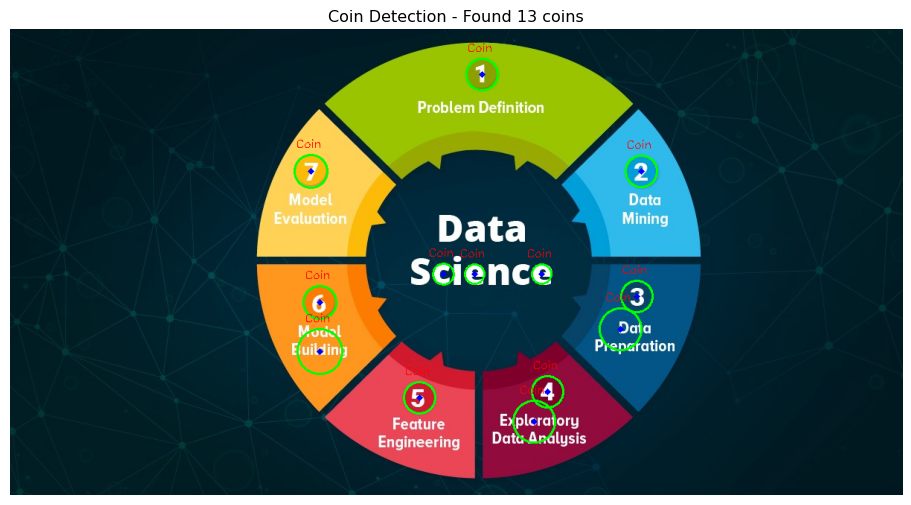

In [7]:
#| eval: true
def count_coins(image):
    """Count circular objects (coins) in an image"""
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply median blur to reduce noise
    blurred = cv2.medianBlur(gray, 5)
    
    # Use HoughCircles to detect circular objects
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=30,
        param1=50,
        param2=30,
        minRadius=10,
        maxRadius=100
    )
    
    result_img = image.copy()
    coin_count = 0
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        coin_count = len(circles)
        
        # Draw detected circles
        for (x, y, r) in circles:
            cv2.circle(result_img, (x, y), r, (0, 255, 0), 2)
            cv2.circle(result_img, (x, y), 2, (0, 0, 255), 3)
            cv2.putText(result_img, f"Coin", (x-20, y-r-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    return result_img, coin_count

# Test coin counting (works best with images of coins on a plain background)
coins_img, coin_count = count_coins(img_rgb)

plt.figure(figsize=(12, 8))
plt.imshow(coins_img)
plt.title(f"Coin Detection - Found {coin_count} coins")
plt.axis('off')
plt.show()

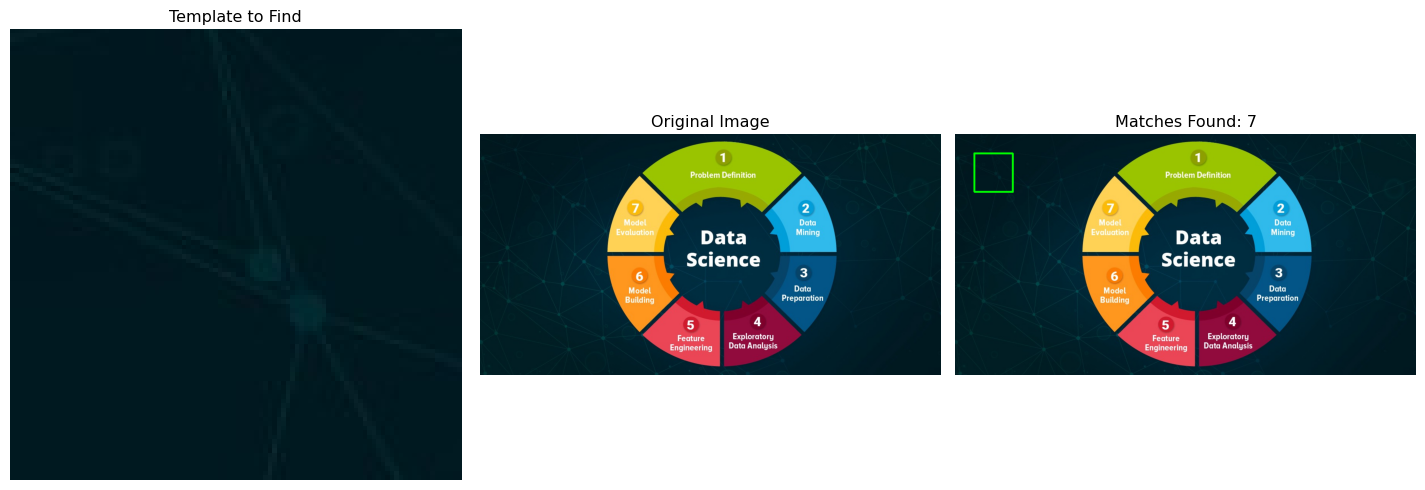

In [8]:
#| eval: true
def find_template(image, template, threshold=0.8):
    """Find template in image using template matching"""
    # Convert both to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
    
    # Perform template matching
    result = cv2.matchTemplate(gray_img, gray_template, cv2.TM_CCOEFF_NORMED)
    
    # Find locations where matching exceeds threshold
    locations = np.where(result >= threshold)
    
    # Draw rectangles around matches
    result_img = image.copy()
    h, w = gray_template.shape
    
    for pt in zip(*locations[::-1]):  # Switch x and y coordinates
        cv2.rectangle(result_img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
    
    return result_img, len(locations[0])

# Create a simple template (you can crop from your image)
# For demo, let's use a small patch from the original image
template = img_rgb[50:150, 50:150]  # 100x100 patch

matched_img, match_count = find_template(img_rgb, template, threshold=0.6)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(template)
plt.title("Template to Find")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_img)
plt.title(f"Matches Found: {match_count}")
plt.axis('off')

plt.tight_layout()
plt.show()

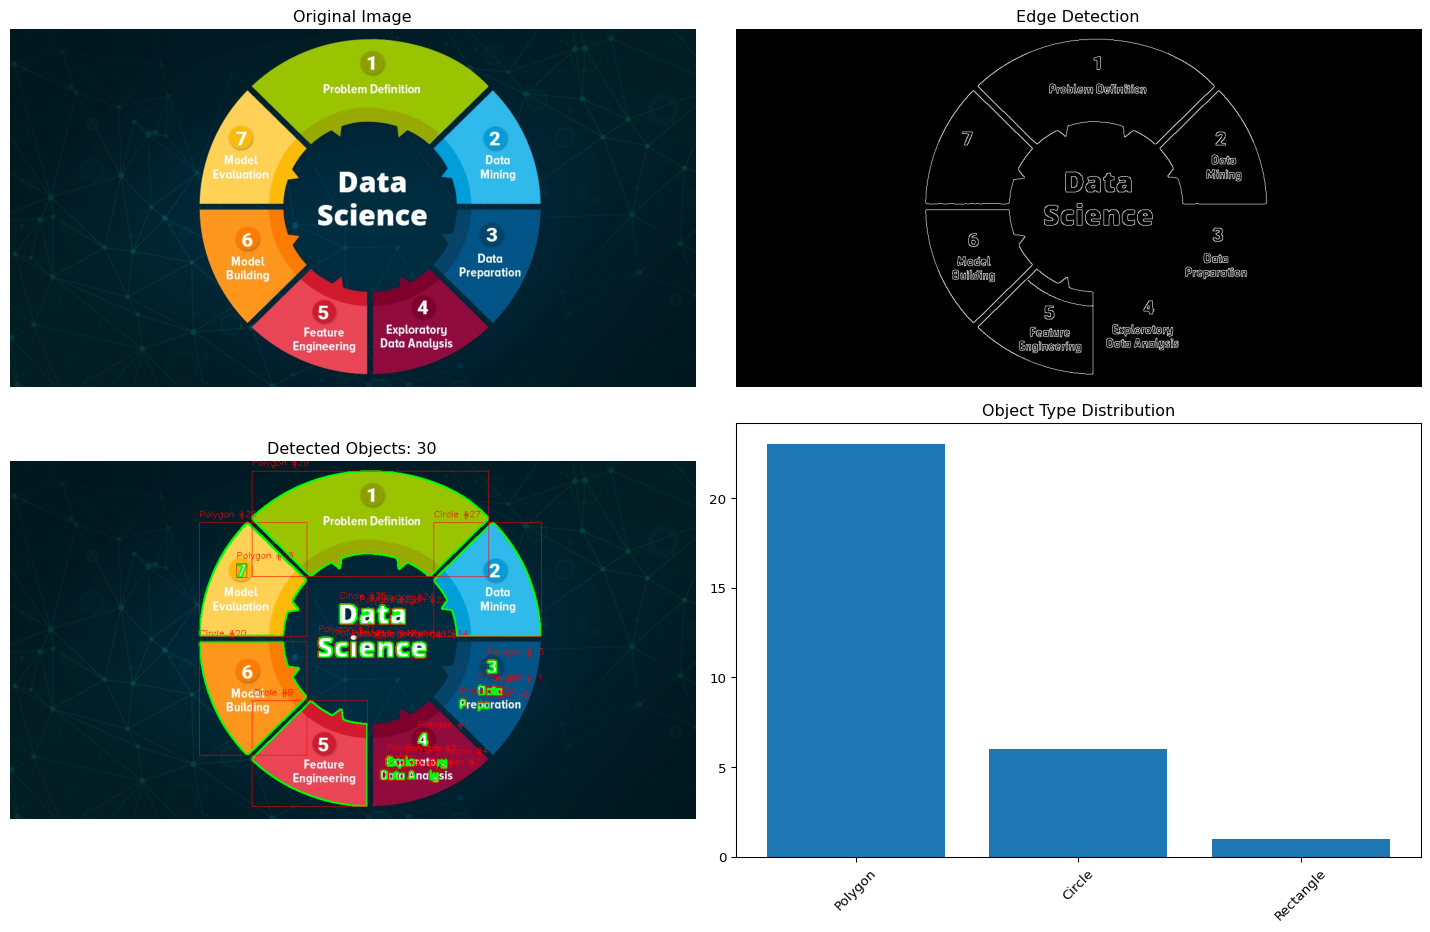

Detection Results:
Total objects found: 30

Object details:
  Object 0: Polygon
    Area: 260 pixels
    Aspect Ratio: 1.81
    Bounding Box: (662, 543, 29, 16)
  Object 1: Polygon
    Area: 119 pixels
    Aspect Ratio: 0.81
    Bounding Box: (696, 542, 13, 16)
  Object 2: Polygon
    Area: 142 pixels
    Aspect Ratio: 0.77
    Bounding Box: (733, 541, 17, 22)
  Object 3: Circle
    Area: 169 pixels
    Aspect Ratio: 0.72
    Bounding Box: (648, 541, 13, 18)
  Object 4: Polygon
    Area: 152 pixels
    Aspect Ratio: 1.12
    Bounding Box: (746, 522, 19, 17)
  Object 5: Polygon
    Area: 137 pixels
    Aspect Ratio: 0.94
    Bounding Box: (691, 517, 17, 18)
  Object 6: Polygon
    Area: 320 pixels
    Aspect Ratio: 1.45
    Bounding Box: (658, 517, 32, 22)
  Object 7: Polygon
    Area: 251 pixels
    Aspect Ratio: 0.79
    Bounding Box: (713, 476, 19, 24)
  Object 8: Polygon
    Area: 206 pixels
    Aspect Ratio: 1.31
    Bounding Box: (818, 423, 21, 16)
  Object 9: Circle
    Area: 241

In [9]:
#| eval: true
class SimpleObjectDetector:
    def __init__(self):
        self.min_contour_area = 100
        self.canny_low = 50
        self.canny_high = 150
    
    def preprocess(self, image):
        """Preprocess image for better detection"""
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        return blurred
    
    def find_objects(self, image):
        """Find all objects in the image"""
        # Preprocess
        processed = self.preprocess(image)
        
        # Edge detection
        edges = cv2.Canny(processed, self.canny_low, self.canny_high)
        
        # Find contours
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Filter contours by area
        valid_contours = [c for c in contours if cv2.contourArea(c) > self.min_contour_area]
        
        return valid_contours, edges
    
    def analyze_objects(self, contours, image):
        """Analyze detected objects"""
        results = []
        result_img = image.copy()
        
        for i, contour in enumerate(contours):
            # Basic properties
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            
            # Bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h
            
            # Shape classification
            shape = classify_shape(contour)
            
            # Store results
            obj_info = {
                'id': i,
                'area': area,
                'perimeter': perimeter,
                'aspect_ratio': aspect_ratio,
                'shape': shape,
                'bbox': (x, y, w, h)
            }
            results.append(obj_info)
            
            # Draw on image
            cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 2)
            cv2.rectangle(result_img, (x, y), (x + w, y + h), (255, 0, 0), 1)
            cv2.putText(result_img, f"{shape} #{i}", (x, y-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        
        return results, result_img
    
    def detect(self, image):
        """Complete detection pipeline"""
        contours, edges = self.find_objects(image)
        results, result_img = self.analyze_objects(contours, image)
        
        return {
            'objects': results,
            'result_image': result_img,
            'edges': edges,
            'object_count': len(results)
        }

# Use the detector
detector = SimpleObjectDetector()
detection_results = detector.detect(img_rgb)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(detection_results['edges'], cmap='gray')
plt.title("Edge Detection")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(detection_results['result_image'])
plt.title(f"Detected Objects: {detection_results['object_count']}")
plt.axis('off')

plt.subplot(2, 2, 4)
# Create a summary plot
object_shapes = [obj['shape'] for obj in detection_results['objects']]
shape_counts = {}
for shape in object_shapes:
    shape_counts[shape] = shape_counts.get(shape, 0) + 1

if shape_counts:
    shapes = list(shape_counts.keys())
    counts = list(shape_counts.values())
    plt.bar(shapes, counts)
    plt.title("Object Type Distribution")
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, "No objects detected", ha='center', va='center', transform=plt.gca().transAxes)
    plt.title("No Objects Found")

plt.tight_layout()
plt.show()

# Print detailed results
print("Detection Results:")
print(f"Total objects found: {detection_results['object_count']}")
print("\nObject details:")
for obj in detection_results['objects']:
    print(f"  Object {obj['id']}: {obj['shape']}")
    print(f"    Area: {obj['area']:.0f} pixels")
    print(f"    Aspect Ratio: {obj['aspect_ratio']:.2f}")
    print(f"    Bounding Box: {obj['bbox']}")

In [10]:
#| eval: true
def count_pages(image):
    """Count rectangular pages/documents in an image"""
    # Your code here!
    # Hint: Look for large rectangular contours
    pass

In [11]:
#| eval: true
def detect_parking_spaces(image):
    """Detect empty parking spaces (rectangular regions)"""
    # Your code here!
    # Hint: Look for rectangular shapes of a certain size
    pass

In [12]:
#| eval: true
def detect_playing_cards(image):
    """Detect playing cards in an image"""
    # Your code here!
    # Hint: Cards are rectangular with a specific aspect ratio
    pass